In [1]:
import numpy as np
from HestonFunctions import Heston_explicit_bf, HestonCallClosedForm
import matplotlib.pyplot as plt

In [2]:
def compare():
    #print(HestonCallClosedForm(lambda_= 2, vbar= 0.2, eta=0.2, rho=-0.8, v0=0, r=0.03, tau=1, S0=200, K=100))

    # Define the range of S0 and v0
    S0_range = np.linspace(0, 200, 41)
    v0_range = np.linspace(0, 1, 21)

    # Create a meshgrid of S0 and v0
    S0, v0 = np.meshgrid(S0_range, v0_range)

    # Initialize the HestonPrice matrix
    U_exact = np.zeros((len(v0_range), len(S0_range)))

    # Calculate the HestonPrice matrix
    for i in range(len(v0_range)):
        for j in range(len(S0_range)):
            if S0_range[j] == 0:
                U_exact[i][j] = 0
            else:
                U_exact[i][j] = HestonCallClosedForm(lambda_= 2, vbar= 0.2, eta=0.3, rho=0.8, v0=v0_range[i], r=0.03, tau=1, S0=S0_range[j], K=100)

    U_explicit, U_time = Heston_explicit_bf(kappa=2, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/3000, S0=200, I=40, J=20, K=100)

    return U_exact, U_explicit, U_time


In [3]:
U_exact, U_explicit, U_time = compare()

print(U_exact.shape)

100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   (21, 41)


In [4]:
print(U_explicit.shape)

(41, 21)


Text(0, 0.5, 'Volume difference')

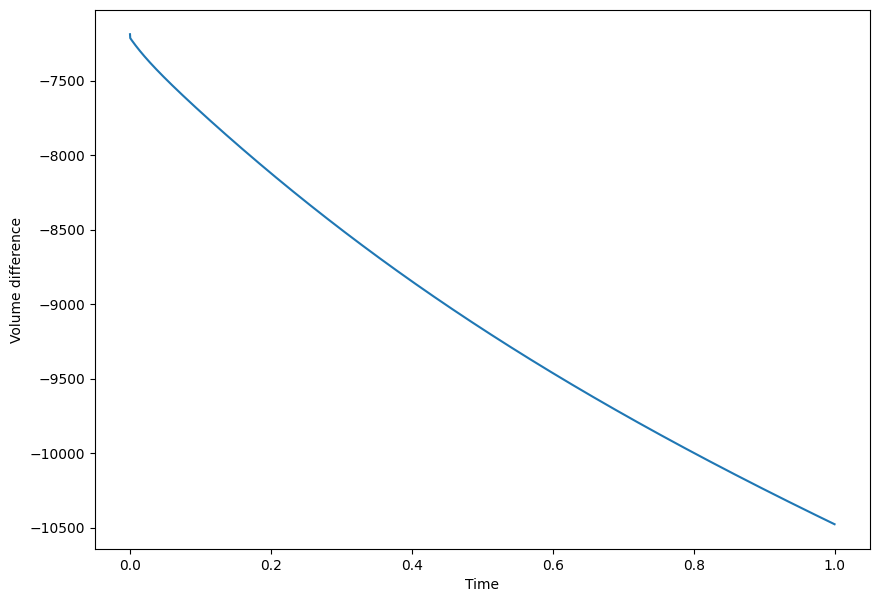

In [5]:
def cal_vol(U_exact, U_explicit, dS, dV):
    U_exact_vol = np.sum(U_exact)*dS*dV
    U_explicit_vol = np.sum(U_explicit)*dS*dV

    return U_exact_vol - U_explicit_vol

volume = np.zeros(len(U_time))
for n in range(len(U_time)):
    volume[n] = cal_vol(U_exact, U_time[n], 5, 0.05)
    # print(volume[n], end="-----")

fig = plt.figure(figsize=(10, 7))
time = np.linspace(0, 1, 3000)
plt.plot(time, volume, label='Volume')
plt.xlabel('Time')
plt.ylabel('Volume difference')

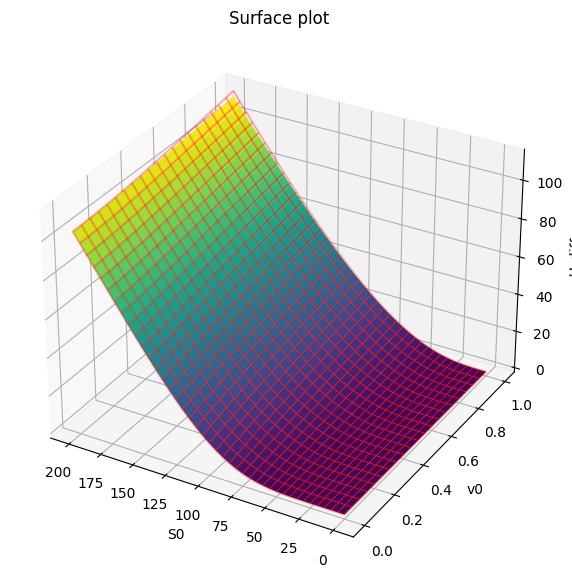

In [6]:
# Define the range of S0 and v0
S0_range = np.linspace(0, 200, 41)
v0_range = np.linspace(0, 1, 21)

# Create a meshgrid of S0 and v0
S0, v0 = np.meshgrid(S0_range, v0_range)



fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(S0, v0, U_exact, cmap='viridis', edgecolor='none')
ax.plot_wireframe(S0, v0, U_explicit.T, color = 'r', alpha = 0.3)
ax.set_title('Surface plot')
ax.invert_xaxis()
ax.set_xlabel('S0')
ax.set_ylabel('v0')
ax.set_zlabel('U_diff')
plt.show()

Text(0, 0.5, 'U')

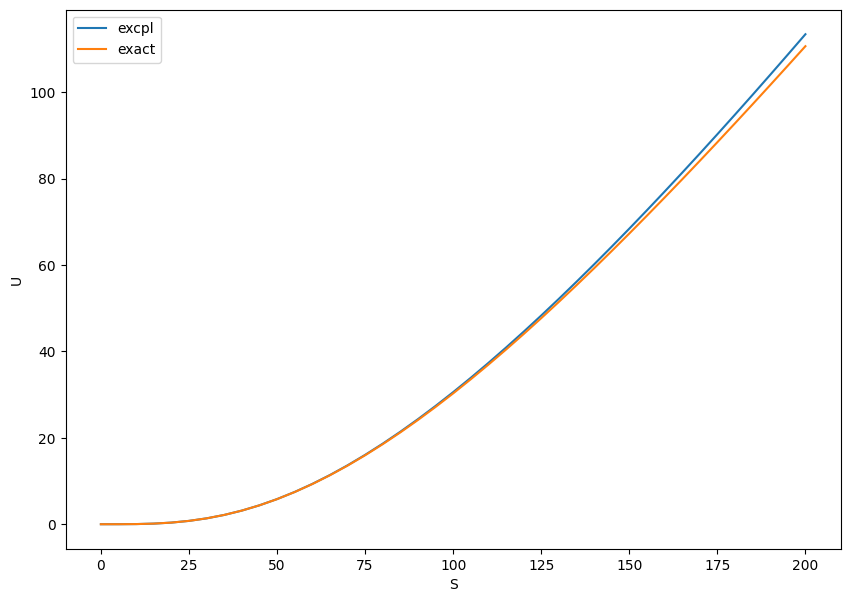

In [7]:
fig = plt.figure(figsize=(10, 7))
time = np.linspace(0, 1, 3000)
plt.plot(S0_range, U_explicit.T[:][-1], label='excpl')
plt.plot(S0_range, U_exact[:][-1], label='exact')
plt.legend()
plt.xlabel('S')
plt.ylabel('U')

Text(0, 0.5, 'U')

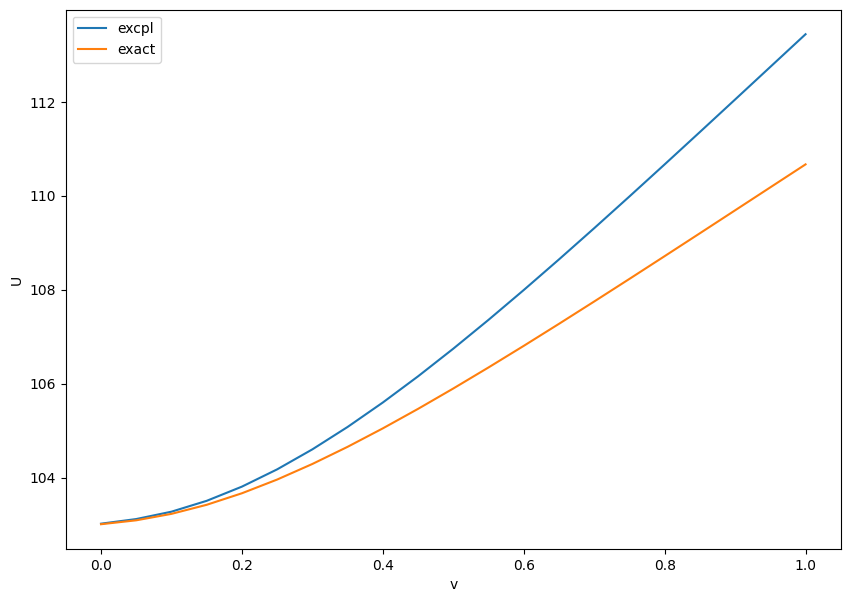

In [8]:
fig = plt.figure(figsize=(10, 7))
v0_range = np.linspace(0, 1, 21)
time = np.linspace(0, 1, 3000)
plt.plot(v0_range, U_explicit.T[:, -1], label='excpl')
plt.plot(v0_range, U_exact[: , -1], label='exact')
plt.legend()
plt.xlabel('v')
plt.ylabel('U')

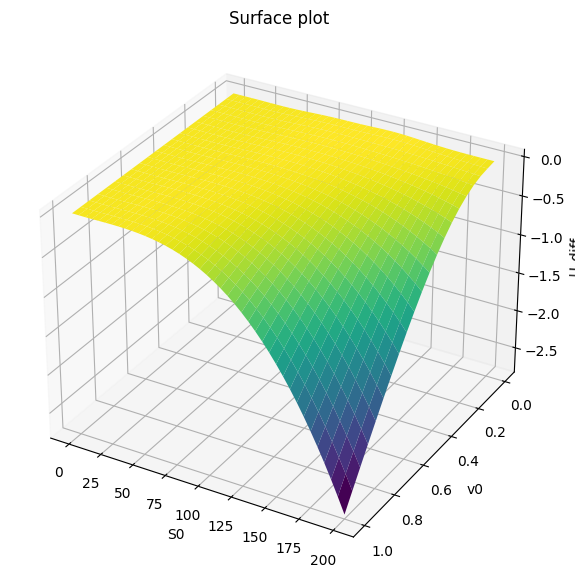

In [9]:
U_diff = U_exact - U_explicit.T

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(S0, v0, U_diff, cmap='viridis', edgecolor='none')
# ax.plot_wireframe(S0, v0, U_explicit.T, color = 'r', alpha = 0.3)
ax.set_title('Surface plot')
ax.invert_yaxis()
ax.set_xlabel('S0')
ax.set_ylabel('v0')
ax.set_zlabel('U_diff')
plt.show()

In [ ]:
# compare with dt

